In [815]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange

seed(90)

## Pré-processando os Dados

In [816]:
kc1 = pd.read_csv('KC1.csv')

kc1.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


In [817]:
kc1['defects'] = kc1['defects'].astype('int64')
# kc1 = (kc1 - kc1.min())/(kc1.max() - kc1.min())

In [818]:
kc1_list = kc1.values.tolist()

for i, val in enumerate(kc1_list):
    kc1_list[i] = tuple(val)

## Implementação do Algoritmo KNN

In [819]:
def euclidean_distance(x,y):
    ret = 0
    w = list(zip(x,y))
    w.pop()
    for a,b in w:
        ret += (a-b)**2

    return (ret, int(x[-1]))

In [820]:
def knn(k,x,query,weighted,distance_function, n_class):
    distance = [ distance_function(i, query) for i in x ]
    distance = sorted(distance, key=lambda z: z[0])
    votes = [0] * n_class
    for i in range(k):
        if int(distance[i][0]) == 0:
            return distance[i][1]
            
        if weighted == 1:
            votes[ distance[i][1] ] += 1.0/distance[i][0]
        else: votes[ distance[i][1] ] += 1
    
    if(votes[1] > votes[0]): #alterar para n classes
        return 1
    else: return 0
    

## Cross Validation Implementação

In [821]:
def train_test_split(data,split=0.70):
    test_size = int((1-split) * len(data))
    test = []
    for i in range(test_size):
        index = randrange(len(data))
        test.append(data.pop(index))
    return data, test

In [822]:
def cross_validation_k_fold(k, train):
    fold_size = int(len(train)/k)
    fold_set = []
    for i in range(k-1):
        fold = []
        for j in range(fold_size):
            index = randrange(len(train))
            fold.append(train.pop(index))
        fold_set.append(fold)
    fold_set.append(train)
    return fold_set

## Avaliando o algoritmo KNN com peso e sem peso

In [916]:
def plot_(accuracy,K,ax):
    x,y = zip(*accuracy)
    ax.plot(K,x,'r-',label='weighted')
    ax.plot(K,y,'b-',label='not weighted')
    ax.legend()
    plt.xlabel('K')
    plt.ylabel('accuracy')


In [824]:
from random import seed
K = [1,2,3,5,7,9,11,13,15]



def concatenate(foldset,index):
    ret = []
    for i, x in enumerate(foldset):
        if i != index:
            ret += x
    return ret


def eval_model(train, distance_function, num_folds):

    accuracy = []
    foldset = cross_validation_k_fold(num_folds, train.copy())
    for k in K:
        folds_accuracy = []
        for i in range(num_folds):
            weighted = 0
            not_weighted = 0
            trainset = concatenate(foldset.copy(),i)
            for j in foldset[i]:
                weighted += 1 if knn(k, trainset.copy(),j, 1, distance_function, 2) == int(j[-1]) else 0
                not_weighted += 1 if knn(k, trainset.copy(),j, 0, distance_function, 2) == int(j[-1]) else 0

            folds_accuracy.append((weighted/len(foldset[i]), not_weighted/len(foldset[i])))

        weighted = not_weighted = 0

        for i,j in folds_accuracy:
            weighted += i
            not_weighted += j

        accuracy.append((weighted/num_folds, not_weighted/num_folds))
        
    return accuracy


In [825]:
def predict(train, test, distance_function):
    accuracy = []
    for k in K:
        weighted = 0
        not_weighted = 0
        for i in test:
            weighted += 1 if knn(k, train.copy(),i, 1, distance_function,2) == int(i[-1]) else 0
            not_weighted += 1 if knn(k, train.copy(),i, 0, distance_function,2) == int(i[-1]) else 0
        accuracy.append((weighted/len(test), not_weighted/len(test)))

    return accuracy

In [826]:
train, test = train_test_split(kc1_list.copy())
accuracy1 = eval_model(train, euclidean_distance, 10)

In [827]:
cm1 = pd.read_csv('CM1.csv')
cm1['defects'] = cm1['defects'].astype('int64')
cm1_list = cm1.values.tolist()

for i, val in enumerate(cm1_list):
    cm1_list[i] = tuple(val)

In [828]:
train, test = train_test_split(cm1_list.copy())
accuracy2 = eval_model(train, euclidean_distance, 10)

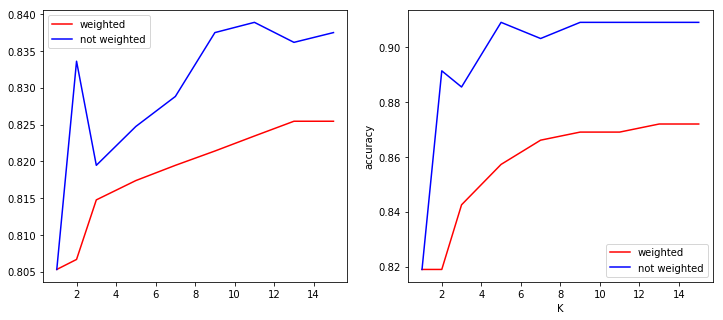

In [921]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plot_(accuracy1,K, ax)
plot_(accuracy2,K, ax2)
plt.show()

# Questão 2


# VDM

In [899]:
def foo(df,num_class):
    attrs = list(df.columns.values)
    attrs.pop()

    N = {}
    for i, val in enumerate(attrs):
        N[i] = {}
        a = df[val].unique()
        for j in a:
            N[i][j] = [0]  * num_class

    
    for x in df.itertuples():
        for i in range(len(attrs)):
            N[i][x[i]][x[-1]] += 1
            
    return N

In [900]:
def vdm(i,a,b,classes_list,N):
    classes_list.pop()
    ret = 0
    for c,val in enumerate(classes_list):
        p1 = N[i][a][c] / sum(N[i][a])
        p2 = N[i][b][c] / sum(N[i][b])
        ret += abs(p1 - p2)
        
    return ret

In [901]:
def VDM(a,b,classes_list,N):
    w = list(zip(a,b))
    ret = 0
    for i,x,y in w:
        ret += vdm(i,x,y,classes_list,N)
        
    return ret